In [1]:
# Basic Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data\stud.csv')
df.shape

(1000, 8)

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Preparing X and Y variables

In [5]:
X = df.drop(columns=['math_score'],axis=1)
y = df['math_score']

X.shape,y.shape


((1000, 7), (1000,))

In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


### Create Column Transformer with 3 types of transformers

In [7]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [8]:
num_features

Index(['reading_score', 'writing_score'], dtype='object')

In [9]:
cat_features

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
ss = StandardScaler()
ohe = OneHotEncoder()

In [12]:
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe, cat_features),
        ("StandardScaler", ss, num_features),        
    ]
)

In [13]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [14]:
X_trf = preprocessor.fit_transform(X)
X_trf

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [15]:
X_trf.shape

(1000, 19)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trf,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_scores = r2_score(true, predicted)
    return mae, mse, rmse, r2_scores

In [18]:
models = {
    "Linear regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbor regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "andom Forest" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor()    
}

In [19]:
len(models)

9

In [20]:
model_list = []
r2_list = []


for i in range(len(models)):
    model = list(models.values())[i]
    
    # train the model : 
    model.fit(X_train,y_train)
    
    # make predictions : 
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    
    # Evaluate Train and test:
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2_score = evaluate_model(y_train,y_train_pred)      
    
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2_score = evaluate_model(y_test,y_pred)
    
    # model name:
    print('Model used is ',list(models.keys())[i])
    print()
    
    # model name in a list
    model_list.append(list(models.keys())[i])
    
    
    print('Model performance for Training set :')
    
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_score))
    
    print("----"*30)
    
    
    print('Model performance for Testing set : ')
    
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_score))
    
    r2_list.append(model_test_r2_score)
    print("===="*30)
    print()
    
    

Model used is  Linear regression

Model performance for Training set :
- Mean Squared Error: 28.3810
- Root Mean Squared Error: 5.3274
- Mean Absolute Error: 4.2788
- R2 Score: 0.8741
------------------------------------------------------------------------------------------------------------------------
Model performance for Testing set : 
- Mean Squared Error: 29.2638
- Root Mean Squared Error: 5.4096
- Mean Absolute Error: 4.2259
- R2 Score: 0.8797

Model used is  Lasso

Model performance for Training set :
- Mean Squared Error: 43.4784
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
------------------------------------------------------------------------------------------------------------------------
Model performance for Testing set : 
- Mean Squared Error: 42.5064
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253

Model used is  Ridge

Model performance for Training set :
- Mean Squared Error: 28.3378
- Root Mean

Model used is  Decision Tree

Model performance for Training set :
- Mean Squared Error: 0.0781
- Root Mean Squared Error: 0.2795
- Mean Absolute Error: 0.0187
- R2 Score: 0.9997
------------------------------------------------------------------------------------------------------------------------
Model performance for Testing set : 
- Mean Squared Error: 60.4750
- Root Mean Squared Error: 7.7766
- Mean Absolute Error: 6.1550
- R2 Score: 0.7515

Model used is  andom Forest

Model performance for Training set :
- Mean Squared Error: 5.1551
- Root Mean Squared Error: 2.2705
- Mean Absolute Error: 1.7975
- R2 Score: 0.9771
------------------------------------------------------------------------------------------------------------------------
Model performance for Testing set : 
- Mean Squared Error: 36.6715
- Root Mean Squared Error: 6.0557
- Mean Absolute Error: 4.6507
- R2 Score: 0.8493

Model used is  XGBRegressor

Model performance for Training set :
- Mean Squared Error: 1.0146
- Ro

### RESULTS : 

In [21]:
m = pd.DataFrame(zip( model_list,r2_list))
m.columns=['Model','r2_score']
m

,Model,r2_score
0,Linear regression,0.879740
1,Lasso,0.825320
2,Ridge,0.880593
3,K-Neighbor regressor,0.783898
4,Decision Tree,0.751478
5,andom Forest,0.849298
6,XGBRegressor,0.827797
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.853743


ridge has the best accuracy

### Linear Regression

In [38]:
ridge_model = Ridge(fit_intercept=True,alpha=0.01)

ridge_model = ridge_model.fit(X_train, y_train)

y_pred = ridge_model.predict(X_test)

score = r2_score(y_test, y_pred)*100

print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


#### Plot y_pred and y_test

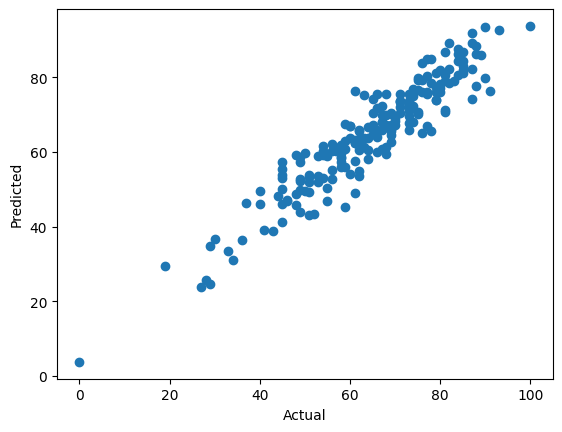

In [39]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

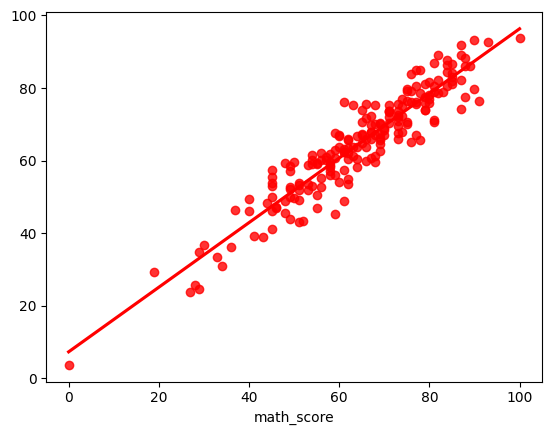

In [40]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [41]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred,'percent_diff':np.round((y_test-y_pred)/y_test*100,2)})
pred_df

,Actual Value,Predicted Value,Difference,percent_diff
521,91,76.388081,14.611919,16.06
737,53,58.885508,-5.885508,-11.10
740,80,76.990291,3.009709,3.76
660,74,76.851340,-2.851340,-3.85
411,84,87.627273,-3.627273,-4.32
...,...,...,...,...
408,52,43.409995,8.590005,16.52
332,62,62.152413,-0.152413,-0.25
208,74,67.888623,6.111377,8.26
613,65,67.022691,-2.022691,-3.11
